In [48]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException, StaleElementReferenceException
import pandas as pd
import time
import re

# Set up WebDriver (Ensure you have the correct driver for your browser)
driver = webdriver.Chrome()

# List to hold all reviews for each mobile
all_reviews = []

# Function to extract the product ID from the URL
def get_product_id(url):
    # Use a regex to find the product ID
    match = re.search(r'pid=([^&]+)', url)
    if match:
        return match.group(1)
    else:
        print(f"Could not extract product ID from {url}.")
        return None

# Function to click the "Read More" button with retries
def click_read_more(review):
    try:
        # Wait for the "Read More" button to be present
        read_more_button = WebDriverWait(review, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "_1BWGvX")))
        driver.execute_script("arguments[0].click();", read_more_button)
    except (NoSuchElementException, TimeoutException):
        pass
        
def get_review_content(review):
    retries = 3
    for _ in range(retries):
        try:
            content = review.find_element(By.CLASS_NAME, "ZmyHeo").text
            return content
        except StaleElementReferenceException:
            time.sleep(1)  # Wait briefly and retry
    return None  # Return None if still not found after retries
    
# Function to extract reviews from the current page
def extract_reviews(mobile_name, product_id):
    review_elements = driver.find_elements(By.CLASS_NAME, "EPCmJX")
    
    # If no reviews are found on this page, return False to indicate it
    if not review_elements:
        return False
    
    for review in review_elements:
        review_data = {'mobile': mobile_name, 'product_id': product_id}  # mobile name and product ID here for each review
        try:
            review_data['rating'] = review.find_element(By.CLASS_NAME, "XQDdHH").text
        except NoSuchElementException:
            review_data['rating'] = "N/A"
        try:
            review_data['title'] = review.find_element(By.CLASS_NAME, "z9E0IG").text
        except NoSuchElementException:
            review_data['title'] = "N/A"
        try:
            review_data['content'] = get_review_content(review)
        except:
            review_data['content'] = "N/A"
        all_reviews.append(review_data)
    return True

# Function to fetch reviews for a given mobile
def fetch_reviews(url, mobile_name):
    product_id = get_product_id(url)  # Get product ID automatically
    if not product_id:
        return  # Exit if product ID could not be fetched
    driver.get(url)

    while True:
        try:
            # Wait for reviews to load
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "EPCmJX")))
            # Extract reviews from the current page
            reviews_found = extract_reviews(mobile_name, product_id)
            # Check if there is a "Next" button for pagination
            try:
                next_button = driver.find_element(By.XPATH, "//a[contains(@class, '_9QVEpD') and span[text()='Next']]")      
                # Scroll the button into view
                driver.execute_script("arguments[0].scrollIntoView(true);", next_button)
                # Click the "Next" button
                driver.execute_script("arguments[0].click();", next_button)
                if reviews_found:
                    print(f"Reviews found for {mobile_name}, navigating to the next page.")
                else:
                    print(f"No reviews on this page for {mobile_name}, but navigating to the next page.")
                
                time.sleep(2)  # Optional delay between pages
            except NoSuchElementException:
                print(f"No Next button found for {mobile_name}. Finished fetching reviews.")
                break
        except TimeoutException:
            print(f"Moving to next mobile.")
            break

# List of mobile URLs and names to fetch reviews
mobile_data = [
    {"url": "https://www.flipkart.com/motorola-edge-50-pro-5g-68w-charger-luxe-lavender-256-gb/product-reviews/itmba8105d0d22ad?pid=MOBGXFXYMTKAMPTS", "name": "Motorola Edge 50 Pro 5G"},
   {"url": "https://www.flipkart.com/realme-13-pro-5g-monet-purple-512-gb/product-reviews/itm1e3e0852d520a?pid=MOBH3WFFXGEVENF6&lid=LSTMOBH3WFFXGEVENF6BZ9CCZ&marketplace=FLIPKART", "name": "realme 13 Pro+ 5G"},
{"url":"https://www.flipkart.com/samsung-galaxy-s23-5g-cream-128-gb/product-reviews/itmc77ff94cdf044?pid=MOBGMFFX5XYE8MZN&lid=LSTMOBGMFFX5XYE8MZNRGKCA5&marketplace=FLIPKART", "name": "SAMSUNG Galaxy S23 5G"},
{"url":"https://www.flipkart.com/google-pixel-8-mint-128-gb/product-reviews/itm67e2a2531aaac?pid=MOBGW6NGMC7FNGMC&lid=LSTMOBGW6NGMC7FNGMCZEJQWC&marketplace=FLIPKART","name": "Google Pixel 8"},
{"url":"https://www.flipkart.com/apple-iphone-12-blue-128-gb/product-reviews/itm02853ae92e90a?pid=MOBFWBYZKPTZF9VG&lid=LSTMOBFWBYZKPTZF9VGHUA0UC&marketplace=FLIPKART","name": "Apple iPhone 12"},
{"url":"https://www.flipkart.com/motorola-edge-40-eclipse-black-256-gb/product-reviews/itmbe5b18bf1f229?pid=MOBGKHNBY3JZJHTB&lid=LSTMOBGKHNBY3JZJHTB0I8TCJ&marketplace=FLIPKART","name": "Motorola Edge 40"}]

# Loop through each mobile URL to fetch reviews
for mobile in mobile_data:
    fetch_reviews(mobile['url'], mobile['name'])

# Print reviews and save to CSV
for review in all_reviews:
    print(review)

Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the next page.
Reviews found for Motorola Edge 50 Pro 5G, navigating to the nex

In [49]:
len(all_reviews)

814

In [50]:
df = pd.DataFrame(all_reviews)

In [51]:
df

,mobile,product_id,rating,title,content
0,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Delightful,"Edit 1: Wireless charging worth it,50w is true..."
1,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Wonderful,Nice camera and display..... Beautiful design....
2,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Good quality product,Writing this review after 2 weeks usage.....Fe...
3,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,5,Must buy!,Very good purchase in my opinion fair opinion\...
4,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,5,Mind-blowing purchase,Great job by Motorola
...,...,...,...,...,...
809,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Nice product,Slim and nice pH and osm camera and looking fo...
810,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Pretty good,The phone is slim and light weight. The displa...
811,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Worth the money,The phone looks good and made me fall in love ...
812,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Worth the money,Good to see that MOTOROLA is back.\nThis Phone...


In [52]:
df.to_csv("reviews.csv", index=False)
print("Reviews saved to 'reviews.csv'")

Reviews saved to 'reviews.csv'


In [2]:
import pandas as pd
import re

In [3]:
dr = pd.read_csv("reviews.csv")

In [4]:
dr

,mobile,product_id,rating,title,content
0,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Delightful,"Edit 1: Wireless charging worth it,50w is true..."
1,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Wonderful,Nice camera and display..... Beautiful design....
2,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Good quality product,Writing this review after 2 weeks usage.....Fe...
3,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,5,Must buy!,Very good purchase in my opinion fair opinion\...
4,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,5,Mind-blowing purchase,Great job by Motorola
...,...,...,...,...,...
809,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Nice product,Slim and nice pH and osm camera and looking fo...
810,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Pretty good,The phone is slim and light weight. The displa...
811,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Worth the money,The phone looks good and made me fall in love ...
812,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Worth the money,Good to see that MOTOROLA is back.\nThis Phone...


In [5]:
dr.isnull().sum()
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mobile      814 non-null    object
 1   product_id  814 non-null    object
 2   rating      814 non-null    int64 
 3   title       814 non-null    object
 4   content     814 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.9+ KB


In [6]:
# Cleaning the data
dr['title'] = dr['title'].str.replace(r'<[^>]*>-', '', regex=True)
dr.dropna(inplace=True)

In [9]:
import pandas as pd
import re
# Function to clean text
def clean_text(text):
    # Define terms to remove if they are redundant
    terms_to_remove = ['purchase', 'buy', 'read more', '\\']
    # Join terms into a regex pattern
    pattern = r'\b(?:' + '|'.join(map(re.escape, terms_to_remove)) + r')\b'
    # Clean and keep core sentiment terms
    cleaned_review = re.sub(pattern, '', text, flags=re.IGNORECASE)
    # Remove any extra spaces created
    cleaned_review = re.sub(r'\s{2,}', ' ', cleaned_review).strip()
    return cleaned_review
# Apply the clean_text function to the 'content' column
dr['content'] = dr['content'].apply(clean_text)

In [10]:
dr

,mobile,product_id,rating,title,content
0,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Delightful,"Edit 1: Wireless charging worth it,50w is true..."
1,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Wonderful,Nice camera and display..... Beautiful design....
2,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Good quality product,Writing this review after 2 weeks usage.....Fe...
3,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,5,Must buy!,Very good in my opinion fair opinion\nCamera\n...
4,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,5,Mind-blowing purchase,Great job by Motorola
...,...,...,...,...,...
809,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Nice product,Slim and nice pH and osm camera and looking fo...
810,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Pretty good,The phone is slim and light weight. The displa...
811,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Worth the money,The phone looks good and made me fall in love ...
812,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Worth the money,Good to see that MOTOROLA is back.\nThis Phone...


In [11]:
dr.to_csv('flipkart_review.csv',index=False)
print("cleaned & saved")

cleaned & saved


In [20]:
df = pd.read_csv('flipkart_review.csv')

In [21]:
df

,mobile,product_id,rating,title,content
0,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Delightful,"Edit 1: Wireless charging worth it,50w is true..."
1,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Wonderful,Nice camera and display..... Beautiful design....
2,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Good quality product,Writing this review after 2 weeks usage.....Fe...
3,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,5,Must buy!,Very good in my opinion fair opinion\nCamera\n...
4,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,5,Mind-blowing purchase,Great job by Motorola
...,...,...,...,...,...
809,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Nice product,Slim and nice pH and osm camera and looking fo...
810,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Pretty good,The phone is slim and light weight. The displa...
811,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Worth the money,The phone looks good and made me fall in love ...
812,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Worth the money,Good to see that MOTOROLA is back.\nThis Phone...


In [84]:
#Sentiment analysis using text blob
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --- ----------------------------------- 61.4/626.3 kB 544.7 kB/s eta 0:00:02
   --------------- ------------------------ 235.5/626.3 kB 1.6 MB/s eta 0:00:01
   -------------------------- ------------- 419.8/626.3 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.5 MB/s eta 0:00:00


In [16]:
#from textblob import TextBlob

# Function to get sentiment score using TextBlob
#def textblob_sentiment(text):
#    analysis = TextBlob(text)
#    return analysis.sentiment.polarity

# Apply sentiment analysis to the 'content' column
#df['textblob_sentiment'] = df['content'].apply(textblob_sentiment)

# Show the sentiment scores
#df[['content', 'textblob_sentiment']].head()


,content,textblob_sentiment
0,"Edit 1: Wireless charging worth it,50w is true...",0.753500
1,Nice camera and display..... Beautiful design....,0.750000
2,Writing this review after 2 weeks usage.....Fe...,0.458333
3,Very good in my opinion fair opinion\nCamera\n...,0.354444
4,Great job by Motorola,0.800000


In [32]:
from textblob import TextBlob
import pandas as pd
# Function to get polarity using TextBlob
def textblob_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function to classify the core sentiment based on polarity score
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to adjust sentiment based on star rating and polarity score
def conditional_sentiment(polarity, stars):
    if stars >= 3 and polarity > 0:
        return 'positive'  # 3 stars and above with positive polarity
    elif stars == 2 and 0 <= polarity <= 0.3:
        return 'neutral'  # 2 stars with polarity between 0 and 0.3
    else:
        return 'negative'

# Apply polarity function to the 'content' column
df['sentiment_score'] = df['content'].apply(textblob_polarity)

# Apply core sentiment classification
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Assuming there is a 'star_rating' column in the dataset
# Apply conditional sentiment based on polarity and star rating
df['adjusted_sentiment'] = df.apply(lambda row: conditional_sentiment(row['sentiment_score'], row['rating']), axis=1)

# Display the results with content, polarity, core sentiment, and adjusted sentiment
df

,mobile,product_id,rating,title,content,sentiment_score,sentiment,adjusted_sentiment
0,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Delightful,"Edit 1: Wireless charging worth it,50w is true...",0.753500,positive,positive
1,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Wonderful,Nice camera and display..... Beautiful design....,0.750000,positive,positive
2,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,4,Good quality product,Writing this review after 2 weeks usage.....Fe...,0.458333,positive,positive
3,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,5,Must buy!,Very good in my opinion fair opinion\nCamera\n...,0.354444,positive,positive
4,Motorola Edge 50 Pro 5G,MOBGXFXYMTKAMPTS,5,Mind-blowing purchase,Great job by Motorola,0.800000,positive,positive
...,...,...,...,...,...,...,...,...
809,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Nice product,Slim and nice pH and osm camera and looking fo...,0.600000,positive,positive
810,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Pretty good,The phone is slim and light weight. The displa...,0.178333,positive,positive
811,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Worth the money,The phone looks good and made me fall in love ...,0.345098,positive,positive
812,Motorola Edge 40,MOBGKHNBY3JZJHTB,4,Worth the money,Good to see that MOTOROLA is back.\nThis Phone...,0.193333,positive,positive


In [33]:
# Save results
df.to_csv('sentiment_analysis.csv', index=False)
print("Sentiment analysis completed.")

Sentiment analysis completed.


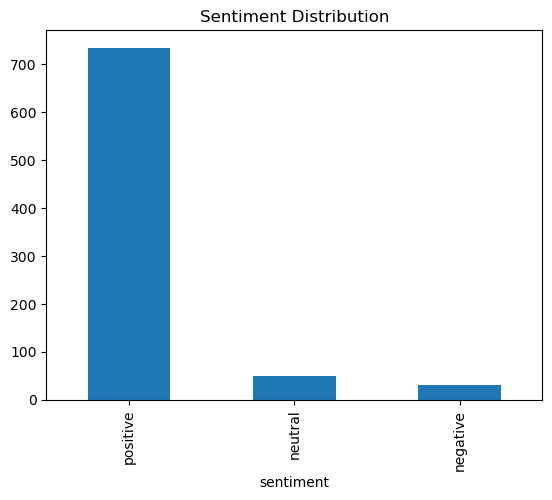

In [36]:
import matplotlib.pyplot as plt

# Visualize sentiment distribution
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()

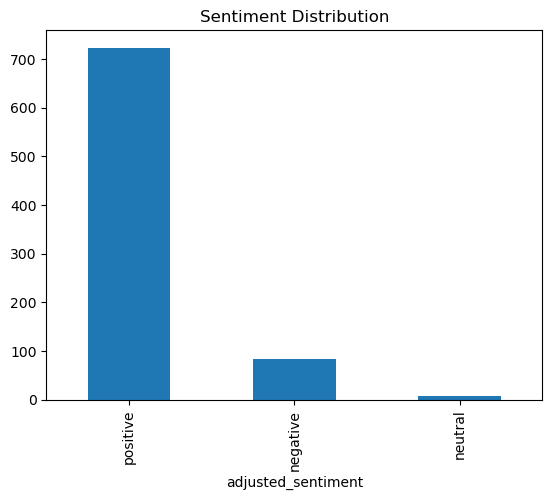

In [37]:
# Visualize sentiment distribution
df['adjusted_sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()

In [34]:
!pip install langchain-community
!pip install langchain 
!pip install langchain langchain_community openai

     ---------------------------------------- 0.0/149.4 kB ? eta -:--:--
     ---------- -------------------------- 41.0/149.4 kB 991.0 kB/s eta 0:00:01
     ------------------------------------ - 143.4/149.4 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 149.4/149.4 kB 1.3 MB/s eta 0:00:00
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
     ---------------------------------------- 0.0/51.7 kB ? eta -:--:--
     ---------------------------------------- 51.7/51.7 kB 1.3 MB/s eta 0:00:00
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB 2.3 MB/s eta 0:00:01
   -- ------------------------------------- 0.2/2.4 MB 2.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.4 MB 2.0 MB/s eta 0:00:02
   ----- ------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.9.2 which is incompatible.
streamlit 1.30.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/383.7 kB ? eta -:--:--
   --- ------------------------------------ 30.7/383.7 kB 1.4 MB/s eta 0:00:01
   -------- ------------------------------- 81.9/383.7 kB 1.5 MB/s eta 0:00:01
   -------------- ------------------------- 143.4/383.7 kB 1.2 MB/s eta 0:00:01
   --------------------- ------------------ 204.8/383.7 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 245.8/383.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 327.7/383.7 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 348.2/383.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 383.7/383.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/202.0 kB ? eta -:--:--
   ------------ --------------------------- 61.4/202.0 kB 1.7 MB/s eta 0:00:01
   ------------------------ --------------- 122.9/202.0 kB 1.4 MB/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


In [35]:
!pip install langchain transformers torch

     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     --------- ------------------------------ 10.2/44.4 kB ? eta -:--:--
     ----------------- -------------------- 20.5/44.4 kB 162.5 kB/s eta 0:00:01
     -------------------------- ----------- 30.7/44.4 kB 187.9 kB/s eta 0:00:01
     -------------------------------------- 44.4/44.4 kB 242.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 1.1 MB/s eta 0:00:09
   ---------------------------------------- 0.1/9.9 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/9.9 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.9 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.9 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/9.9 MB 1.1 MB/s eta 0:00:09
   - ----------------

In [52]:
!pip install tf-keras
!pip uninstall transformers
!pip install transformers
!pip uninstall keras transformers -y
!pip install tf-keras transformers

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.7 MB 469.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.7 MB 722.1 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.7 MB 908.0 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.7 MB 831.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.7 MB 896.4 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.7 MB 922.8 kB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.7 MB 916.6 kB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.7 MB 937.3 kB/s eta 0:00:02
   ----------- ---------------------------- 0.5/1.7 MB 994.4 kB/s eta 0:00:02
   ----------

In [56]:
!pip install --upgrade jupyterlab
!pip install --upgrade ipywidgets

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 1.3 MB/s eta 0:00:10
   ---------------------------------------- 0.1/11.6 MB 1.1 MB/s eta 0:00:11
   ---------------------------------------- 0.1/11.6 MB 1.1 MB/s eta 0:00:11
    --------------------------------------- 0.2/11.6 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.3/11.6 MB 1.1 MB/s eta 0:00:11
    --------------------------------------- 0.3/11.6 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.3/11.6 MB 1.0 MB/s eta 0:00:12
   - -------------------------------------- 0.4/11.6 MB 1.0 MB/s eta 0:00:12
   - -------------------------------------- 0.4/11.6 MB 1.1 MB/s eta 0:00:11
   - -------------------------------------- 0.5/11.6 MB 1.0 MB/s eta 0:00:11
   - -------------------------------------- 0.5/11.6 MB 1.1 MB/s eta 0:00:11
   -- ------------------------------------- 0.6/11.6 MB 1.1 MB/s eta 0:00:11
   -- 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 7.0.8 requires jupyterlab<4.1,>=4.0.2, but you have jupyterlab 4.2.5 which is incompatible.


  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.8 kB ? eta -:--:--
   ----------- --------------------------- 41.0/139.8 kB 667.8 kB/s eta 0:00:01
   ------------------------- ------------- 92.2/139.8 kB 751.6 kB/s eta 0:00:01
   -------------------------------------- 139.8/139.8 kB 925.2 kB/s eta 0:00:00
Using cached comm-0.2.2-py3-none-any.whl (7.2 kB)
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   ------- ------------------------------- 41.0/214.4 kB 991.0 kB/s eta 0:00:01
   --------------------- ------------------ 112.6/214.4 kB 1.3 MB/s eta 0:00:01
   -------------------------------- ------- 174.1/214.4 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 204.8/214.4 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 214.4/214.4 kB 1.0 MB/s eta 0:00:00
   --------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 7.0.8 requires jupyterlab<4.1,>=4.0.2, but you have jupyterlab 4.2.5 which is incompatible.


In [61]:
import pandas as pd
from langchain import PromptTemplate
from langchain.llms import HuggingFacePipeline
from transformers import pipeline
# Set your Hugging Face API key
HUGGING_FACE_API_KEY = "*********************"  

# Load your dataset
df = pd.read_csv("sentiment_analysis.csv")

# Initialize the Hugging Face pipeline for sentiment analysis
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    tokenizer="distilbert-base-uncased-finetuned-sst-2-english",
    device=-1 ) # Use -1 for CPU
# Define a function to analyze sentiment
def analyze_sentiment(row):
    result = sentiment_pipeline(row['content'])
    sentiment = result[0]['label']  # Get the sentiment label
    score = result[0]['score']       # Get the confidence score
    return pd.Series([sentiment, score])  # Return both sentiment and score

# Apply the sentiment analysis function to the DataFrame
df[['predicted_sentiment', 'sentiment_score']] = df.apply(analyze_sentiment, axis=1)

# Define a function to generate product recommendations
def generate_recommendation(row):
    if row['sentiment_score'] >= 0.7:
        return f"Highly recommend {row['mobile']}! Users love it for its {row['content'][:50]}..."
    elif row['sentiment_score'] >= 0.4:
        return f"Consider {row['mobile']} if you're looking for a solid option. Users say: {row['content'][:50]}..."
    else:
        return f"You might want to research more before choosing {row['mobile']}. Some users mentioned: {row['content'][:50]}..."

# Apply the recommendation function to the DataFrame
df['recommendation'] = df.apply(generate_recommendation, axis=1)

# Display the results
print(df[['title', 'content', 'sentiment_score', 'predicted_sentiment', 'recommendation']])


                     title                                            content  \
0               Delightful  Edit 1: Wireless charging worth it,50w is true...   
1                Wonderful  Nice camera and display..... Beautiful design....   
2     Good quality product  Writing this review after 2 weeks usage.....Fe...   
3                Must buy!  Very good in my opinion fair opinion\nCamera\n...   
4    Mind-blowing purchase                              Great job by Motorola   
..                     ...                                                ...   
809           Nice product  Slim and nice pH and osm camera and looking fo...   
810            Pretty good  The phone is slim and light weight. The displa...   
811        Worth the money  The phone looks good and made me fall in love ...   
812        Worth the money  Good to see that MOTOROLA is back.\nThis Phone...   
813        Value-for-money  This is an excellent device from Motorola. I r...   

     sentiment_score predic

In [66]:
df.columns

Index(['mobile', 'product_id', 'rating', 'title', 'content', 'sentiment_score',
       'sentiment', 'adjusted_sentiment'],
      dtype='object')

In [76]:
import pandas as pd
from langchain import PromptTemplate

# Load the dataset that already contains sentiment_score and adjusted_sentiment
df = pd.read_csv("sentiment_analysis.csv")

top_mobile_phone = df.groupby('mobile').agg(
    average_sentiment_score=('sentiment_score', 'mean'),
    average_adjusted_sentiment=('adjusted_sentiment', 'count')  # Keeping adjusted sentiment count for simplicity
).reset_index()

# Sort by average sentiment score and adjusted sentiment in descending order
top_mobile_phones = top_mobile_phones.sort_values(
    by=['average_sentiment_score'],  # Sorting by average sentiment score
    ascending=False
).head(1)  # Get the top 1 mobile phone

# Define the LangChain template for recommendation
template = """
Based on sentiment analysis, we recommend the following mobile phone:

**Model**: {mobile}
- Average Sentiment Score: {average_sentiment_score:.2f}
- Positive Sentiment Count: {average_adjusted_sentiment}

This mobile is highly recommended by users for its excellent features and performance!
"""

# Create a PromptTemplate in LangChain
recommendation_template = PromptTemplate.from_template(template)

# Generate recommendations for the top phone
for _, row in top_mobile_phones.iterrows():
    prompt = recommendation_template.format(
        mobile=row['mobile'],
        average_sentiment_score=row['average_sentiment_score'],
        average_adjusted_sentiment=row['average_adjusted_sentiment']
    )
    print(prompt)


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: Apple iPhone 12
- Average Sentiment Score: 0.57
- Positive Sentiment Count: 109

This mobile is highly recommended by users for its excellent features and performance!



In [77]:
top_mobile_phone.to_pickle('top_mobile_phones.pkl')

In [78]:
dp = pd.read_pickle('top_mobile_phones.pkl')
dp

,mobile,average_sentiment_score,average_adjusted_sentiment
0,Apple iPhone 12,0.568003,109
1,Google Pixel 8,0.366132,150
2,Motorola Edge 40,0.439645,184
3,Motorola Edge 50 Pro 5G,0.443541,129
4,SAMSUNG Galaxy S23 5G,0.449507,142
5,realme 13 Pro+ 5G,0.455775,100


In [75]:
#import pandas as pd
#from langchain import PromptTemplate

# Load the dataset that already contains sentiment_score and adjusted_sentiment
#df = pd.read_csv("sentiment_analysis.csv")

#top_mobile_phones = df.groupby('mobile').agg(
#    average_sentiment_score=('sentiment_score', 'mean'),
#    average_adjusted_sentiment=('adjusted_sentiment', 'count')  # Keeping adjusted sentiment count for simplicity
#).reset_index()

# Sort by average sentiment score and adjusted sentiment in descending order
#top_mobile_phones = top_mobile_phones.sort_values(
#    by=['average_sentiment_score'],  # Sorting by average sentiment score
#    ascending=False
#).head(5)  # Get the top 5 mobile phone

# Define the LangChain template for recommendation
#template = """
#Based on sentiment analysis, we recommend the following mobile phone:

#**Model**: {mobile}
#- Average Sentiment Score: {average_sentiment_score:.2f}
#- Positive Sentiment Count: {average_adjusted_sentiment}

#This mobile is highly recommended by users for its excellent features and performance!
#"""

# Create a PromptTemplate in LangChain
#recommendation_template = PromptTemplate.from_template(template)

# Generate recommendations for the top phone
#for _, row in top_mobile_phones.iterrows():
#    prompt = recommendation_template.format(
#        mobile=row['mobile'],
#        average_sentiment_score=row['average_sentiment_score'],
#        average_adjusted_sentiment=row['average_adjusted_sentiment']
#    )
#    print(prompt)


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: Apple iPhone 12
- Average Sentiment Score: 0.57
- Positive Sentiment Count: 109

This mobile is highly recommended by users for its excellent features and performance!


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: realme 13 Pro+ 5G
- Average Sentiment Score: 0.46
- Positive Sentiment Count: 100

This mobile is highly recommended by users for its excellent features and performance!


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: SAMSUNG Galaxy S23 5G
- Average Sentiment Score: 0.45
- Positive Sentiment Count: 142

This mobile is highly recommended by users for its excellent features and performance!


Based on sentiment analysis, we recommend the following mobile phone:

**Model**: Motorola Edge 50 Pro 5G
- Average Sentiment Score: 0.44
- Positive Sentiment Count: 129

This mobile is highly recommended by users for its excellent fea